In [1]:
import os
import pathlib
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gemmi
import seaborn as sns

## 5.1 Normalizing B factor: Total atoms.

Example: ACS Med. Chem. Lett. 2018, 9, 878−883.     
Protein Science (1997), 6:2561-2567.     
B-factor prediction in proteins using a sequence-based deep learning model. Pandey, Akash et al. Patterns, Volume 4, Issue 9, 100805

In [106]:
# Test on a single PDB file.
structure = gemmi.read_structure("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data/2yp9_final.pdb")

In [107]:
structure = structure
# Check model.
i = 0
model = structure[i]  # consider the first model (skip if empty)
while len(model) == 0:  # sometimes the first model is empty
    i += 1
    try:
        model = structure[i]
    except Exception:
        raise ValueError("Can't read valid model from the input PDB file!")

In [77]:
lookup={x.atom: x for x in model.all()}

In [78]:
len(lookup.keys())

2488

In [79]:
lookup.keys()

dict_keys([<gemmi.Atom N at (13.0, 32.4, -18.1)>, <gemmi.Atom CA at (12.9, 31.1, -18.7)>, <gemmi.Atom CB at (14.0, 30.2, -18.2)>, <gemmi.Atom CG at (15.4, 30.6, -18.8)>, <gemmi.Atom OD1 at (15.5, 31.5, -19.6)>, <gemmi.Atom ND2 at (16.4, 29.8, -18.4)>, <gemmi.Atom C at (11.6, 30.4, -18.3)>, <gemmi.Atom O at (11.4, 29.9, -17.3)>, <gemmi.Atom N at (10.6, 30.5, -19.2)>, <gemmi.Atom CA at (9.2, 30.0, -19.0)>, <gemmi.Atom CB at (8.2, 30.5, -20.0)>, <gemmi.Atom C at (9.3, 28.5, -19.0)>, <gemmi.Atom O at (10.1, 27.9, -19.8)>, <gemmi.Atom N at (8.4, 27.8, -18.3)>, <gemmi.Atom CA at (8.1, 26.4, -18.4)>, <gemmi.Atom CB at (7.2, 25.9, -17.4)>, <gemmi.Atom CG at (7.6, 25.9, -16.0)>, <gemmi.Atom OD1 at (8.8, 25.5, -15.7)>, <gemmi.Atom ND2 at (6.8, 26.3, -15.2)>, <gemmi.Atom C at (7.6, 26.2, -19.8)>, <gemmi.Atom O at (6.9, 27.0, -20.4)>, <gemmi.Atom N at (7.9, 25.0, -20.4)>, <gemmi.Atom CA at (7.2, 24.6, -21.6)>, <gemmi.Atom CB at (7.9, 23.4, -22.1)>, <gemmi.Atom CG at (8.4, 22.8, -20.9)>, <gemmi.Ato

In [80]:
at = list(lookup.keys())[0]

In [81]:
at.name

'N'

In [85]:
list(at.pos)

[13.035, 32.445, -18.099]

In [8]:
b_facs={x.atom.b_iso: x for x in model.all()}

In [9]:
b_facs

{61.689998626708984: <gemmi.CRA A/ASN 8/N>,
 58.4900016784668: <gemmi.CRA A/ASN 8/CA>,
 63.61000061035156: <gemmi.CRA A/ASN 8/CB>,
 70.37000274658203: <gemmi.CRA A/ASN 8/CG>,
 74.23999786376953: <gemmi.CRA A/ASN 8/OD1>,
 73.11000061035156: <gemmi.CRA A/ASN 8/ND2>,
 54.4900016784668: <gemmi.CRA A/HOH 4446/O>,
 55.90999984741211: <gemmi.CRA A/ASN 8/O>,
 41.97999954223633: <gemmi.CRA A/SER 9/N>,
 29.1299991607666: <gemmi.CRA A/HOH 4512/O>,
 29.25: <gemmi.CRA A/SER 9/CB>,
 29.84000015258789: <gemmi.CRA A/SER 9/OG>,
 21.0: <gemmi.CRA A/SER 9/C>,
 18.600000381469727: <gemmi.CRA A/LEU 164/CD2>,
 16.780000686645508: <gemmi.CRA A/HOH 4023/O>,
 15.489999771118164: <gemmi.CRA A/LEU 244/CD2>,
 18.559999465942383: <gemmi.CRA A/PHE 159/CD1>,
 21.040000915527344: <gemmi.CRA A/SER 199/CB>,
 19.309999465942383: <gemmi.CRA A/ASP 188/CA>,
 11.649999618530273: <gemmi.CRA A/ASP 461/N>,
 12.25: <gemmi.CRA A/GLU 432/CA>,
 9.850000381469727: <gemmi.CRA A/GLN 363/CA>,
 9.0600004196167: <gemmi.CRA A/THR 12/OG1>

In [12]:
unnorm_b_facs = list(b_facs.keys())
len(unnorm_b_facs)
# unnorm_b_facs
# Calculate the mean and standard deviation of the B-factors.
mean_b_factor = np.mean(unnorm_b_facs)
std_b_factor = np.std(unnorm_b_facs)
print(mean_b_factor, std_b_factor)


27.006414666657214 17.16629121967882


In [13]:
def calc_mean(list):
    """Calculate the mean value of a list."""
    list = np.array(list) # Convert list to numpy array.
    mean_value = np.sum(list) / len(list)
    return mean_value

def calc_std(list):
    """ Calculate the standard deviation of a list."""
    mean_value = calc_mean(list)
    std_value = np.sqrt(np.sum((np.array(list) - mean_value)**2) / len(list))
    return std_value
    

In [15]:
# See if the function generate the same result as the numpy functions.
print(calc_mean(unnorm_b_facs), np.mean(unnorm_b_facs))
print(calc_std(unnorm_b_facs), np.std(unnorm_b_facs))


27.006414666657214 27.006414666657214
17.16629121967882 17.16629121967882


In [21]:
type(norm_b_facs)

numpy.ndarray

In [16]:
# Obtain normalized B-factors.
norm_b_facs = (unnorm_b_facs - mean_b_factor) / std_b_factor

In [25]:
def normalize_b_facs(list):
    """Normalize the B-factors."""
    list = np.array(list) # Convert list to numpy array.
    mean_value = np.mean(list)
    std_value = np.std(list)
    normalized_list = (list - mean_value) / std_value
    return normalized_list


(array([ 11.,  26.,  53.,  95., 102., 106., 104., 106., 101.,  98.,  86.,
         82.,  79.,  72.,  67.,  58.,  51.,  39.,  49.,  46.,  35.,  38.,
         28.,  27.,  23.,  23.,  28.,  22.,  36.,  30.,  11.,  25.,  26.,
         27.,  29.,  17.,  18.,  15.,  31.,  25.,  17.,  13.,  15.,  18.,
         14.,  11.,  18.,  18.,  14.,  14.,   9.,  12.,   7.,   6.,   3.,
          6.,   3.,   3.,   3.,   4.,   3.,   3.,   2.,   8.,   2.,   2.,
          2.,   3.,   4.,   1.,   0.,   2.,   1.,   2.,   1.,   0.,   0.,
          1.,   1.,   1.,   1.,   1.,   1.,   2.,   0.,   1.,   1.,   0.,
          2.,   1.,   1.,   0.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,
          2.]),
 array([  6.42000008,   7.48110006,   8.54220005,   9.60330004,
         10.66440002,  11.72550001,  12.7866    ,  13.84769999,
         14.90879997,  15.96989996,  17.03099995,  18.09209993,
         19.15319992,  20.21429991,  21.27539989,  22.33649988,
         23.39759987,  24.45869986,  25.51979984,  26.58089983

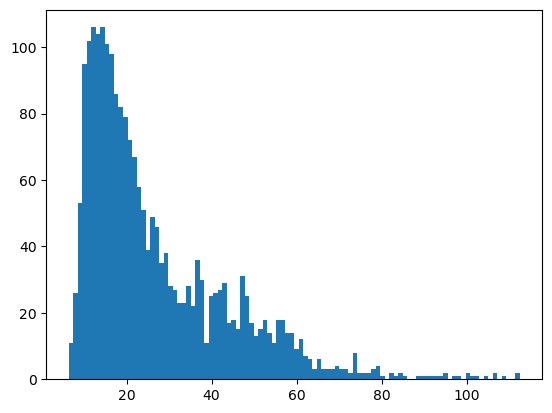

In [ ]:
# Unnormalized B-factors (for all atoms, not just water).
plt.hist(unnorm_b_facs, bins=100)

(array([ 11.,  26.,  53.,  95., 102., 106., 104., 106., 101.,  98.,  86.,
         82.,  79.,  72.,  67.,  58.,  51.,  39.,  49.,  46.,  35.,  38.,
         28.,  27.,  23.,  23.,  28.,  22.,  36.,  30.,  11.,  25.,  26.,
         27.,  29.,  17.,  18.,  15.,  31.,  25.,  17.,  13.,  15.,  18.,
         14.,  11.,  18.,  18.,  14.,  14.,   9.,  12.,   7.,   6.,   3.,
          6.,   3.,   3.,   3.,   4.,   3.,   3.,   2.,   8.,   2.,   2.,
          2.,   3.,   4.,   1.,   0.,   2.,   1.,   2.,   1.,   0.,   0.,
          1.,   1.,   1.,   1.,   1.,   1.,   2.,   0.,   1.,   1.,   0.,
          2.,   1.,   1.,   0.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,
          2.]),
 array([-1.19923485, -1.13742184, -1.07560884, -1.01379584, -0.95198284,
        -0.89016984, -0.82835684, -0.76654383, -0.70473083, -0.64291783,
        -0.58110483, -0.51929183, -0.45747883, -0.39566582, -0.33385282,
        -0.27203982, -0.21022682, -0.14841382, -0.08660082, -0.02478781,
         0.03702519,  0.09

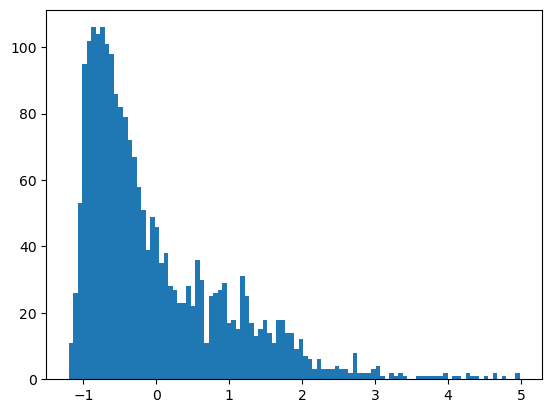

In [18]:
# Normalized B-factors (for all atoms, not just water).
plt.hist(norm_b_facs, bins=100)


In [23]:
# Loop through all the PDB files in the data folder.
# Training set.
train_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/train_split.txt", header=None)
train_list = train_list[0].tolist()
# Test set.
test_list = pd.read_csv("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/test_split.txt", header=None)
test_list = test_list[0].tolist()

pdb_path = pathlib.Path('/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/pdb_redo_data')
pdbs = list(pdb_path.glob('*_final.pdb')) # Pay attention to the pattern of names. A general "*.pdb" would result in duplicate files when looping.
# Train.
pdb_train = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in train_list:
        pdb_train.append(a)
# Test.
pdb_test = []
for a in pdbs:
    name = a.stem.split('_')[0]
    if name in test_list:
        pdb_test.append(a)

In [ ]:
# Create a dictionary of chains and the list of mols of interest for BOTH training and test sets FOR ALL ATOMS.
data1, data2 = pdb_train, pdb_test
norm_b_facs_train, norm_b_facs_test = {}, {}

for norm_dict, data in zip([norm_b_facs_train, norm_b_facs_test], [data1, data2]):
    for a in data: # Loop over all PDB structures.
        name = a.stem.split('_')[0]
        structure = gemmi.read_structure(str(a))
        # Check model.
        i = 0
        model = structure[i]  # consider the first model (skip if empty)
        while len(model) == 0:  # sometimes the first model is empty
            i += 1
            try:
                model = structure[i]
            except Exception:
                raise ValueError("Can't read valid model from the input PDB file!")
            
        b_facs={x.atom.b_iso: x for x in model.all()} # Collect all atoms in the structure.
        unnorm_b_facs = list(b_facs.keys())

        norm_list = normalize_b_facs(unnorm_b_facs) # normalize the B factor across all atoms.
        norm_dict[name] = norm_list # For each PDB file, generate a list of normalized B factors.



In [41]:
# Read the dataframe from previous notebook.
df_wat_train=pd.read_pickle('df_water_4_train.pkl')
df_wat_test=pd.read_pickle('df_water_4_test.pkl')

In [45]:
def flat_lists(nested):
    """Create a flattened list from nested lists"""
    flat=[water for chain in nested for water in chain]
    return flat

In [57]:
df_wat_train

,name,structure,b_fac,flat_b_fac,norm_b_fac
0,3lez,"{'A': {'seq_id': ['9', '10', '11', '12', '13',...","[[43.75, 60.560001373291016, 36.29999923706055...","[43.75, 60.560001373291016, 36.29999923706055,...","[0.5461775479958576, 1.8709074217574302, -0.04..."
1,7sie,"{'A': {'seq_id': ['801', '802', '803', '804', ...","[[29.579999923706055, 25.299999237060547, 16.1...","[29.579999923706055, 25.299999237060547, 16.11...","[0.7496664004849352, 0.30097004336837235, -0.6..."
2,6rt3,"{'A': {'seq_id': ['301', '302', '304', '305', ...","[[19.1200008392334, 31.6299991607666, 46.61999...","[19.1200008392334, 31.6299991607666, 46.619998...","[-0.7137340632249344, 0.24209927722686025, 1.3..."
3,3qx5,"{'L': {'seq_id': ['1001', '1002', '1003', '100...","[[9.819999694824219, 12.380000114440918, 11.40...","[9.819999694824219, 12.380000114440918, 11.409...","[-1.799654082964333, -1.5984945740175414, -1.6..."
4,2hph,"{'A': {'seq_id': ['702', '703', '704', '705', ...","[[7.960000038146973, 10.25, 7.730000019073486,...","[7.960000038146973, 10.25, 7.730000019073486, ...","[-1.7365016652082974, -1.5096135792749747, -1...."
...,...,...,...,...,...
4502,5l2v,"{'A': {'seq_id': ['501', '502', '503', '504', ...","[[30.440000534057617, 11.75, 28.54000091552734...","[30.440000534057617, 11.75, 28.540000915527344...","[0.1192184580854802, -1.372258945958635, -0.03..."
4503,8pb7,"{'A': {'seq_id': ['502', '504', '505', '507', ...","[[40.56999969482422, 31.920000076293945, 20.02...","[40.56999969482422, 31.920000076293945, 20.020...","[1.1981857329703487, 0.34789063403635934, -0.8..."
4504,6eau,"{'A': {'seq_id': ['401', '402', '404', '408', ...","[[16.899999618530273, 44.41999816894531, 19.03...","[16.899999618530273, 44.41999816894531, 19.030...","[-0.9876023664378574, 1.2342866976194729, -0.8..."
4505,5kxl,"{'A': {'seq_id': ['301', '302', '303', '304', ...","[[8.760000228881836, 13.220000267028809, 34.68...","[8.760000228881836, 13.220000267028809, 34.680...","[-1.4353743848282003, -0.88615048455927, 1.756..."


In [60]:
df_wat_train.norm_b_fac.values

array([array([ 5.46177548e-01,  1.87090742e+00, -4.09276135e-02,  1.07496610e+00,
              -7.09202914e-01, -7.16295471e-01, -4.19984690e-01, -6.69334549e-02,
               1.76577264e-01,  6.28135916e-01, -3.14384416e-01, -3.19112887e-01,
               8.83142668e-02, -7.30480585e-01, -3.89250378e-01,  4.56338695e-01,
              -2.31638120e-01, -7.99041767e-01, -9.07794206e-01,  1.36812471e+00,
              -3.82945899e-01, -1.56267247e+00, -1.05043312e+00, -1.61862470e+00,
              -1.59655910e+00, -1.07722719e+00, -1.47046938e+00, -9.10946370e-01,
              -1.43106636e+00, -1.28212296e+00,  6.04494160e-01, -1.37826629e+00,
               6.30963536e-02,  2.22474674e+00,  1.20624737e-01,  1.49736659e+00,
               1.77712803e+00, -3.49847200e-01,  1.22154541e+00, -2.77345775e-01,
               5.28517830e-02, -7.09202914e-01, -4.35745811e-01, -1.09220038e+00,
              -2.43459148e-01,  6.80935828e-01,  3.18428100e-01, -9.47985161e-01,
               2

In [ ]:
# Apply the function of flattening list to each row of the dataframe.
for df in [df_wat_train, df_wat_test]:
    df['flat_b_fac'] = None
    df['flat_b_fac'] = df['b_fac'].apply(flat_lists)

In [53]:
# Apply the function of normalization to each row of the dataframe.
for df in [df_wat_train, df_wat_test]:
    df['norm_b_fac'] = None
    try:
        df['norm_b_fac'] = df['flat_b_fac'].apply(normalize_b_facs)
    except RuntimeWarning:
        print(df[df.flat_b_fac == list])

/var/folders/h1/t20btdvj4tz_k2rb3j8bm4dw0000gn/T/ipykernel_20867/556718321.py:6: RuntimeWarning: invalid value encountered in divide
  normalized_list = (list - mean_value) / std_value


(array([3.00000e+00, 2.00000e+00, 4.40000e+01, 3.36000e+02, 2.14300e+03,
        8.96800e+03, 2.56820e+04, 4.72850e+04, 6.76830e+04, 8.81020e+04,
        1.03239e+05, 1.12520e+05, 1.16686e+05, 1.16760e+05, 1.13051e+05,
        1.06851e+05, 9.97960e+04, 9.08310e+04, 8.05030e+04, 6.92380e+04,
        5.76570e+04, 4.63840e+04, 3.54510e+04, 2.69020e+04, 1.91710e+04,
        1.38300e+04, 1.01540e+04, 7.26900e+03, 5.31000e+03, 3.89700e+03,
        2.86500e+03, 2.24800e+03, 1.70700e+03, 1.32800e+03, 1.15800e+03,
        8.53000e+02, 7.00000e+02, 6.14000e+02, 4.46000e+02, 3.97000e+02,
        3.45000e+02, 2.47000e+02, 2.34000e+02, 1.77000e+02, 1.63000e+02,
        1.33000e+02, 1.04000e+02, 9.00000e+01, 7.90000e+01, 6.20000e+01,
        4.30000e+01, 3.70000e+01, 2.90000e+01, 3.20000e+01, 2.10000e+01,
        2.40000e+01, 1.70000e+01, 1.10000e+01, 8.00000e+00, 5.00000e+00,
        7.00000e+00, 8.00000e+00, 5.00000e+00, 3.00000e+00, 4.00000e+00,
        3.00000e+00, 2.00000e+00, 1.00000e+00, 3.00

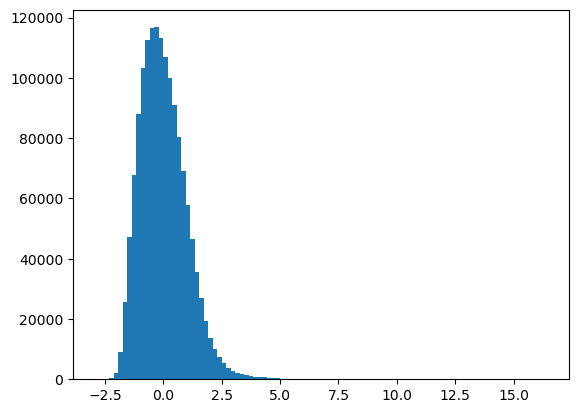

In [61]:
# Normalized B-factors of all PDB. Training.
flat = [a for structure in df_wat_train.norm_b_fac.values for a in structure]
plt.hist(flat, bins=100)

(array([3.0000e+00, 1.0000e+00, 7.0000e+00, 4.0000e+00, 2.0000e+01,
        8.1000e+01, 3.0500e+02, 1.2700e+03, 4.1750e+03, 8.8550e+03,
        1.3378e+04, 1.6757e+04, 1.9447e+04, 2.2254e+04, 2.4395e+04,
        2.6337e+04, 2.7317e+04, 2.8488e+04, 2.8903e+04, 2.8964e+04,
        2.8322e+04, 2.7069e+04, 2.4663e+04, 2.0997e+04, 1.7116e+04,
        1.3609e+04, 1.0081e+04, 6.8700e+03, 4.6930e+03, 2.9110e+03,
        1.9370e+03, 1.1190e+03, 7.1400e+02, 4.0900e+02, 2.4900e+02,
        1.7000e+02, 1.1600e+02, 6.5000e+01, 4.1000e+01, 2.7000e+01,
        2.2000e+01, 1.0000e+01, 6.0000e+00, 9.0000e+00, 2.0000e+00,
        6.0000e+00, 7.0000e+00, 5.0000e+00, 5.0000e+00, 3.0000e+00,
        2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 2.0000e+00, 1.0000e+00, 3.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.00

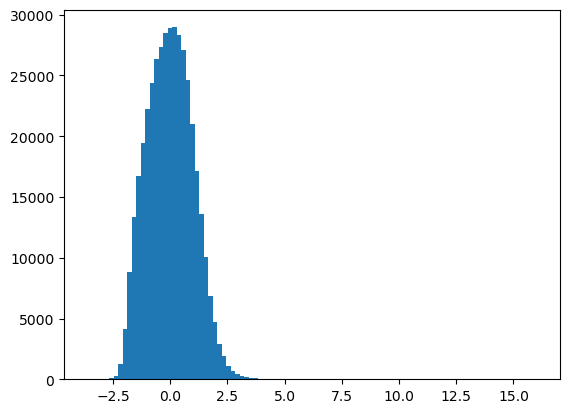

In [62]:
# Normalized B-factors of all PDB. Test.
flat = [a for structure in df_wat_test.norm_b_fac.values for a in structure]
plt.hist(flat, bins=100)

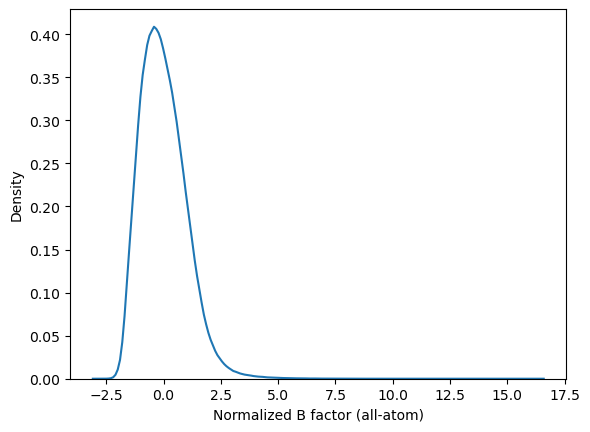

In [63]:
# Normalized B-factors of all PDB. Training.
x_label = 'Normalized B factor (all-atom)'
flat = [a for structure in df_wat_train.norm_b_fac.values for a in structure]
data = pd.DataFrame(flat, columns=[x_label])
sns.kdeplot(data, x=x_label)
# plt.legend()
plt.savefig('figures/5_normB_All_train.png', dpi=200)

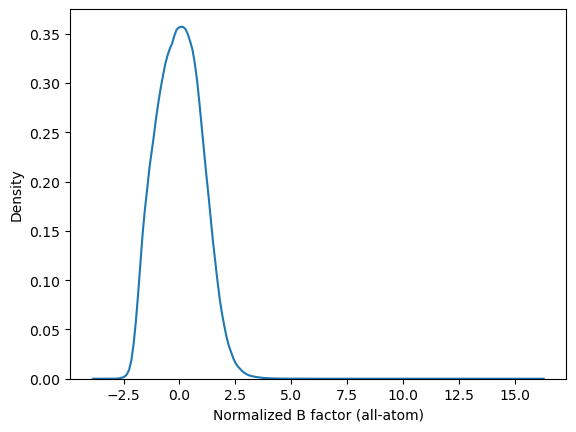

In [64]:
# Normalized B-factors of all PDB. Test.
x_label = 'Normalized B factor (all-atom)'
flat = [a for structure in df_wat_test.norm_b_fac.values for a in structure]
data = pd.DataFrame(flat, columns=[x_label])
sns.kdeplot(data, x=x_label)
# plt.legend()
plt.savefig('figures/5_normB_All_test.png', dpi=200)

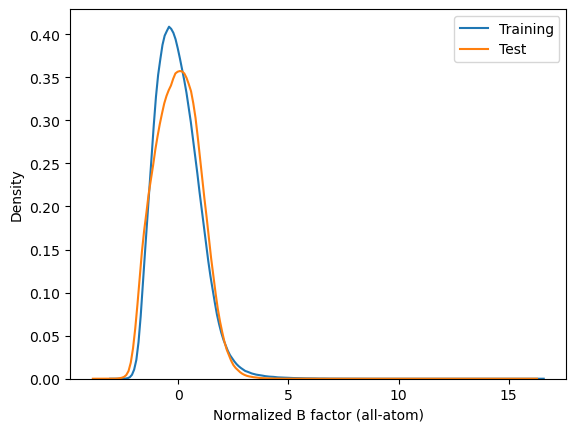

In [66]:
# Normalized B-factors of all PDB. BOTH.
x_label = 'Normalized B factor (all-atom)'
flat = [a for structure in df_wat_train.norm_b_fac.values for a in structure]
flat2 = [a for structure in df_wat_test.norm_b_fac.values for a in structure]
df = pd.DataFrame(flat, columns=[x_label])
df2 = pd.DataFrame(flat2, columns=[x_label])
sns.kdeplot(df, x=x_label, label='Training')
sns.kdeplot(df2, x=x_label, label='Test')
plt.legend()
plt.savefig('figures/5_normB_All_both.png', dpi=200)

## 5.2 Normalizing B factor: Local regions.

Example: https://github.com/wutobias/normalize_B/blob/master/README.md

Approach:   
1. Generate dataframe of information for all atoms: residue, seqid, coordinates, b_factor (occupancy, atom type, symbol).   
2. Calculate interatomic distances.    
3. Choose the atoms with distance less than the set thresold (e.g., 4 angstrom).   
4. Normalize the b factor of water within the b factor of the set of chosen atoms in Step 3. 


In [119]:
# Set the cutoff distance.
radius = 4

In [111]:
# Test on PDB that has water molecules.
structure = gemmi.read_structure("/Users/mingbin/Desktop/Wankowicz_lab_Mac/Projects/water/data/Ex_360W_1a3h_final.pdb")
model = structure[0]

In [112]:
model

<gemmi.Model 1 with 1 chain(s)>

In [113]:
# For each PDB, generate a dictionary like this.
keys=['res', 'seqid', 'atom', 'coord', 'water', 'b_fac', 'occ']
chain_dict={}
for chain in model:
    chain_dict[chain.name] = []
    for res in chain:
        for atom in res: # Store a list of information for each atom.
            chain_dict[chain.name].append([res.name, str(res.seqid), atom.name, list(atom.pos), atom.b_iso, atom.occ])


In [114]:
chain_dict

{'A': [['SER', '4', 'N', [72.672, 44.049, 7.437], 34.43000030517578, 1.0],
  ['SER', '4', 'CA', [73.767, 43.098, 7.377], 29.0, 1.0],
  ['SER', '4', 'CB', [75.073, 43.786, 7.751], 40.029998779296875, 1.0],
  ['SER', '4', 'OG', [74.944, 44.505, 8.962], 44.599998474121094, 1.0],
  ['SER', '4', 'C', [73.546, 41.852, 8.237], 19.709999084472656, 1.0],
  ['SER', '4', 'O', [73.726, 40.748, 7.751], 16.40999984741211, 1.0],
  ['VAL', '5', 'N', [73.121, 42.018, 9.495], 17.309999465942383, 1.0],
  ['VAL', '5', 'CA', [73.006, 40.886, 10.409], 16.510000228881836, 1.0],
  ['VAL', '5', 'CB', [72.637, 41.383, 11.816], 16.940000534057617, 1.0],
  ['VAL', '5', 'CG1', [72.258, 40.215, 12.742], 17.8799991607666, 1.0],
  ['VAL', '5', 'CG2', [73.775, 42.221, 12.414], 18.239999771118164, 1.0],
  ['VAL', '5', 'C', [72.025, 39.815, 9.949], 12.25, 1.0],
  ['VAL', '5', 'O', [72.375, 38.647, 9.838], 14.34000015258789, 1.0],
  ['VAL', '6', 'N', [70.774, 40.21, 9.719], 11.670000076293945, 1.0],
  ['VAL', '6', 'CA', 

In [115]:
# Number of atoms in the chain.
len(chain_dict['A'])

2754

In [ ]:
bfac_all_chain = {}
for chain, at in chain_dict.items():
    # 'at' consists n lists, where n is the number of atoms in the chain
    # each list in 'at' contains: [res, seqid, atom, coord, b_fac, occ].
    # Calculate the distance between each atom and the water.
    bfac_ind_chain = []
    for i in range(len(at)):
        bfac_raw = [] # Reset the list of b factors for each atom.
        if at[i][0] in ['HOH', 'WAT', 'H2O']: # Only consider water molecules.
            # print(at[i][4])
            bfac_raw.extend([at[i][4]]) # Add the b factor of the water molecule.
            for j in range(i+1, len(at)): # i is atom 1, j is atom 2.
                dist = calc_distance(at[i][3], at[j][3])
                if dist < radius:
                    bfac_raw.extend([at[j][4]]) # Add the b factor of each invidual atom that is within the cutoff distance.
            norm_bfac = normalize_b_facs(bfac_raw) # Normalize the b factor of the water molecule. Return a list of normalized b factors (water, and other atoms).
            bfac_ind_chain.append(norm_bfac[0]) # Store the normalized b factor of ONLY the water molecule.
            # Check standard deviation error.
            if np.std(bfac_raw) == 0:
                print(at[i],  bfac_raw) # if no atoms are within the cutoff distance, the standard deviation is 0. Dividing error would occur.
        else:
            continue
    bfac_all_chain[chain] = bfac_ind_chain # bfac_ind_chain is a list of normalized b factors for water molecules in each chain.
            

/var/folders/h1/t20btdvj4tz_k2rb3j8bm4dw0000gn/T/ipykernel_20867/556718321.py:6: RuntimeWarning: invalid value encountered in divide
  normalized_list = (list - mean_value) / std_value


['HOH', '305', 'O', [60.322, 34.783, 28.856], 8.75, 1.0] [8.75]
['HOH', '308', 'O', [61.881, 51.804, 26.806], 10.649999618530273, 1.0] [10.649999618530273]
['HOH', '311', 'O', [73.499, 31.645, 42.704], 10.239999771118164, 1.0] [10.239999771118164]
['HOH', '314', 'O', [71.336, 49.178, 31.47], 12.130000114440918, 1.0] [12.130000114440918]
['HOH', '327', 'O', [49.008, 36.592, 32.476], 9.489999771118164, 1.0] [9.489999771118164]
['HOH', '331', 'O', [68.713, 34.549, 38.299], 12.9399995803833, 1.0] [12.9399995803833]
['HOH', '332', 'O', [49.21, 20.703, 27.014], 9.109999656677246, 1.0] [9.109999656677246]
['HOH', '338', 'O', [73.048, 36.591, 39.669], 12.770000457763672, 1.0] [12.770000457763672]
['HOH', '341', 'O', [81.764, 31.52, 45.668], 12.9399995803833, 1.0] [12.9399995803833]
['HOH', '342', 'O', [64.594, 33.378, 12.374], 10.5, 1.0] [10.5]
['HOH', '343', 'O', [67.589, 36.912, 5.729], 12.800000190734863, 1.0] [12.800000190734863]
['HOH', '346', 'O', [52.889, 47.551, 27.535], 17.28000068664

In [124]:
bfac_all_chain

{'A': [np.float64(-1.0),
  np.float64(nan),
  np.float64(-1.0),
  np.float64(-1.0865914766310425),
  np.float64(nan),
  np.float64(-0.909409326203733),
  np.float64(-1.0),
  np.float64(nan),
  np.float64(-1.0),
  np.float64(0.6590465790371546),
  np.float64(nan),
  np.float64(-0.7358843134662746),
  np.float64(1.0),
  np.float64(1.0),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(-0.8476627768388899),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(1.0),
  np.float64(nan),
  np.float64(-0.585111520436963),
  np.float64(-1.0576057338298264),
  np.float64(-1.3797888568560126),
  np.float64(nan),
  np.float64(nan),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(-1.5033938641433715),
  np.float64(-0.8777536151184427),
  np.float64(nan),
  np.float64(-1.0),
  np.float64(-1.0),
  np.float64(nan),
  np.float64(nan),
  np.float64(nan),
  np.float64(-1.406710172387738),
  np.float64(-1.508705243523

In [94]:
def calc_distance(coord1, coord2):
    """Calculate the distance between two sets of coordinates."""
    try:
        len(coord1), len(coord2)
    except:
        raise ValueError("The input must be a list of coordinates.")
    distance = np.sqrt(np.sum((np.array(coord1) - np.array(coord2))**2))
    return distance
    

In [ ]:
# Create the dictionary of atom lists for BOTH training and test sets FOR ALL ATOMS.
data1, data2 = pdb_train, pdb_test
at_train, at_test = {}, {}

for at_dict, data in zip([at_train, at_test], [data1, data2]):
    for a in data: # Loop over all PDB structures.
        name = a.stem.split('_')[0]
        structure = gemmi.read_structure(str(a))
        # Check model.
        i = 0
        model = structure[i]  # consider the first model (skip if empty)
        while len(model) == 0:  # sometimes the first model is empty
            i += 1
            try:
                model = structure[i]
            except Exception:
                raise ValueError("Can't read valid model from the input PDB file!")
            
        # Generate the dictionary of atom lists for each PDB file.
        chain_dict={}
        for chain in model:
            chain_dict[chain.name] = []
            for res in chain:
                for atom in res: # Store a list of information for each atom.
                    chain_dict[chain.name].append([res.name, str(res.seqid), atom.name, list(atom.pos), atom.b_iso, atom.occ]) 
        at_dict[name] = chain_dict

KeyboardInterrupt: 

In [ ]:
df_all_at_train = pd.DataFrame(at_train)  
df_all_at_test = pd.DataFrame(at_test)  